In [43]:
from IPython.display import display, Image

import os
import base64
import cv2
import matplotlib.pyplot as plt
import openai

# from task_decomposition.paths import DATA_FRAMES_PATH
DATA_FRAMES_PATH= '/Users/jonathansalfity/Documents/dev/task_decomposition/task_decomposition/data/frames'

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [44]:
frames = [cv2.imread(os.path.join(DATA_FRAMES_PATH, 'picknplace', file)) 
          for file in sorted(os.listdir(os.path.join(DATA_FRAMES_PATH, 'picknplace')))]

encoded_frames = [encode_image(os.path.join(DATA_FRAMES_PATH, 'picknplace', file)) 
          for file in sorted(os.listdir(os.path.join(DATA_FRAMES_PATH, 'picknplace')))]

len(encoded_frames)

120

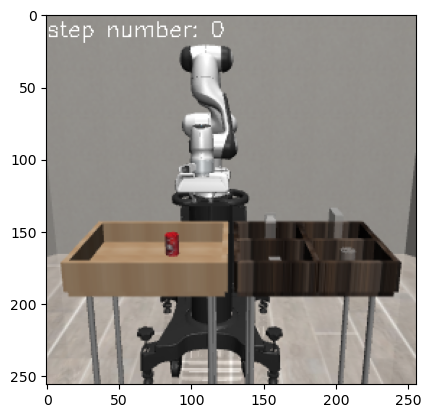

In [45]:
plt.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
plt.show()

In [51]:
PROMPT = """Your task is to ingest the following data and break down what occurred during the robot episode into hierarchical granular subtasks. Each subtask should be a sequential step that occurred during the robot episode. The simulation step is associated with the frame I'm providing to you. You should identify the start step and end step of each subtask. Create as many granular subtasks as you see in the data.

Use chain of thought to break down the data into subtasks.

Report the list of subtasks as a dictionary with at the beginning of your response:
```
{1.1: {'start_step: 1, 'end_step': 10, subtask: '<low level primitive>'},
1.2: {'start_step: 11, 'end_step': 20, subtask: '<low level primitive>'},
2.1: {'start_step: 21, 'end_step': 30, subtask: '<low level primitive>'},
...
}
```
Then explain your thoughts.
"""


PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [PROMPT,
            *map(lambda x: {"image": x, "resize": 256}, encoded_frames[0::10]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "api_key": os.environ["OPENAI_API_KEY"],
    "headers": {"Openai-Version": "2020-11-07"},
    "max_tokens": 500,
}

result = openai.ChatCompletion.create(**params)
print(result.choices[0].message.content)

```
{1: 'Initial positioning',
1.1: {'start_step': 0, 'end_step': 0, 'subtask': 'Robot starts at initial position'},
2: 'Approach Can',
2.1: {'start_step': 1, 'end_step': 17, 'subtask': 'Robot arm moves towards the can'},
3: 'Grasping Can',
3.1: {'start_step': 18, 'end_step': 26, 'subtask': 'Robot arm positions to grasp the can'},
4: 'Lifting Can',
4.1: {'start_step': 27, 'end_step': 35, 'subtask': 'Robot arm grips and lifts the can'},
5: 'Transporting Can to Bin',
5.1: {'start_step': 36, 'end_step': 53, 'subtask': 'Robot arm moves can towards the bin'},
6: 'Lowering Can into Bin',
6.1: {'start_step': 54, 'end_step': 62, 'subtask': 'Robot arm lowers can into the bin'},
7: 'Releasing Can',
7.1: {'start_step': 63, 'end_step': 71, 'subtask': 'Robot arm releases the can'},
8: 'Retracting Arm',
8.1: {'start_step': 72, 'end_step': 89, 'subtask': 'Robot arm retracts from the bin'},
9: 'Return to Initial Position',
9.1: {'start_step': 90, 'end_step': 107, 'subtask': 'Robot arm returns to initi

In [52]:
result

<OpenAIObject chat.completion id=chatcmpl-8LITqcyI7iMpDF4E5X4Rt9yqZt9CW at 0x7f9128ec5c20> JSON: {
  "choices": [
    {
      "finish_details": {
        "type": "max_tokens"
      },
      "index": 0,
      "message": {
        "content": "```\n{1: 'Initial positioning',\n1.1: {'start_step': 0, 'end_step': 0, 'subtask': 'Robot starts at initial position'},\n2: 'Approach Can',\n2.1: {'start_step': 1, 'end_step': 17, 'subtask': 'Robot arm moves towards the can'},\n3: 'Grasping Can',\n3.1: {'start_step': 18, 'end_step': 26, 'subtask': 'Robot arm positions to grasp the can'},\n4: 'Lifting Can',\n4.1: {'start_step': 27, 'end_step': 35, 'subtask': 'Robot arm grips and lifts the can'},\n5: 'Transporting Can to Bin',\n5.1: {'start_step': 36, 'end_step': 53, 'subtask': 'Robot arm moves can towards the bin'},\n6: 'Lowering Can into Bin',\n6.1: {'start_step': 54, 'end_step': 62, 'subtask': 'Robot arm lowers can into the bin'},\n7: 'Releasing Can',\n7.1: {'start_step': 63, 'end_step': 71, 'subtas